In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
names = [i.split('/')[-1][:-5] for i in os.listdir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')]
for n, f in enumerate(os.scandir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')):
    names[n] = pd.read_excel(f)
    names[n].iloc[:, 1]/=sum(names[n].iloc[:, 1])

In [3]:
G = nx.DiGraph()

In [4]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [6]:
abc = [i.split('/')[-1][:-5] for i in os.listdir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')]
for n, f in enumerate(os.scandir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')):
    abc[n] = pd.read_excel(f)

In [8]:
node_sizes_eu=[]
zz=[]
for i in abc:
    name = i.columns[1]
    node_sizes_eu.append(sum(i.iloc[:, 1])/d[name])
    zz.append(name)

In [9]:
europe = []
for country in names:
    name = country.columns[1]
    europe.append(name)
    for n, w in zip(country.iloc[:, 0], country.iloc[:, 1]):
        G.add_weighted_edges_from([(n.strip(),name.strip(),w)])

In [10]:
eu_total=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
   'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu_notconsidered=[i for i in eu_total if i not in set(europe)]

In [11]:
eu_notconsidered

['Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia']

In [12]:
colors = []
for node in G.nodes():
    if node in europe:
        colors.append('dodgerblue')
    elif node in eu_notconsidered:
        colors.append('lime')
    else:
        colors.append('gold')

In [14]:
all_weights=[]
countries=[]
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight'])
        countries.append(node2)
all_weights=np.array(all_weights)*8

In [15]:
all_weights[all_weights<0]=all_weights[all_weights>0].min()
all_weights+=0.1

In [16]:
from collections import Counter
import numpy as np

In [17]:
node_sizes_eu=np.array(node_sizes_eu)*7

In [19]:
d={}
for i in range(len(zz)):
    d[zz[i]]=node_sizes_eu[i]

In [21]:
for i in G.nodes():
    if i not in d.keys():
        d[i]=3
b=list(G.nodes())
ws=[0]*len(b)
for i in range(len(ws)):
    for k,v in d.items():
        if b[i]==k:
            ws[i]=v*900
            break

In [22]:
pos=nx.spring_layout(G, k=1.45,seed=2)

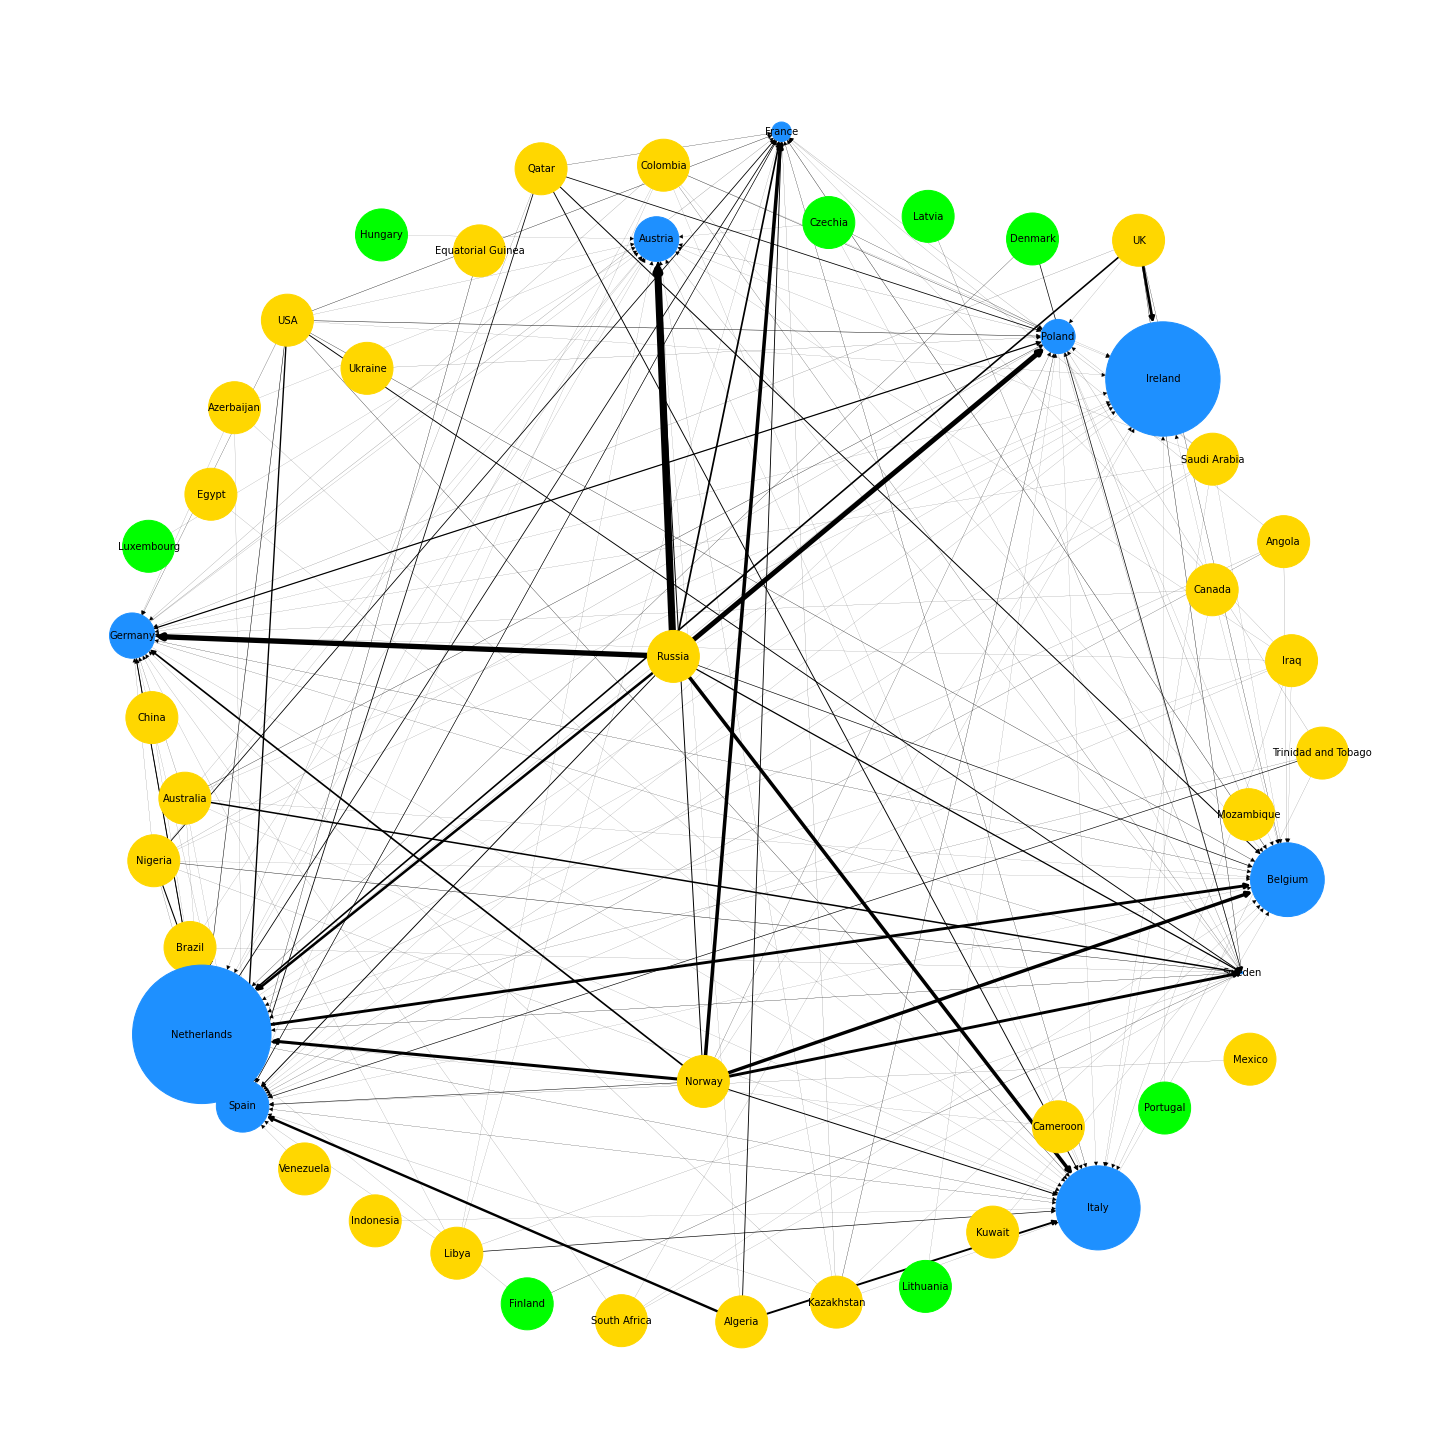

In [24]:
plt.figure(figsize=(20,20))
nx.draw(G, pos = pos,node_color = colors, node_size=ws, width = all_weights)
nx.draw_networkx_labels(G, pos = pos, font_size=10)
#plt.savefig('weighted.png', bbox_inches = 'tight')
plt.show()

In [28]:
print(f'Number of edges: {len(all_weights)-np.argwhere(np.isnan(all_weights)).shape[0]}')
print(f'Average edge weight: {np.mean(all_weights)}')
print(f'Average node size: {np.mean(ws)}')
print(f'Average degree: {len(all_weights)/len(ws)}')

Number of edges: 187
Average edge weight: 0.4993101017115382
Average node size: 3255.0760169436517
Average degree: 3.978723404255319


In [30]:
nodes_ba=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
df_bf=np.array(node_sizes_eu)
nodes_ba['Node sizes Before']=df_bf/7
nodes_ba

,Country,Node sizes Before
0,Austria,0.316523
1,Belgium,0.862875
2,France,0.060129
3,Germany,0.324989
4,Ireland,2.074293
5,Italy,1.120833
6,Netherlands,3.043542
7,Poland,0.185269
8,Spain,0.437530
9,Sweden,0.000775


# Exploring sub networks

## TOP 10 EU

In [31]:
eu_considered=[i for i in eu_total if i not in eu_notconsidered]

In [32]:
H = nx.subgraph(G, eu_considered)

In [33]:
weights_considered=[]
countries=[]
for (node1,node2,data) in H.edges(data=True):
        weights_considered.append(data['weight'])
        #countries.append(node2)
weights_considered=np.array(weights_considered)*4#/np.sum(all_weights)
weights_considered+=0.1

In [34]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [35]:
node_sizes_eu={}
zz=[]
for i in abc:
    name = i.columns[1]
    tot=0
    for j in range(len(i)):
        if i.iloc[j, 0] in eu_considered and i.iloc[j, 1]>0:
            tot+=i.iloc[j, 1]/d[name]
    node_sizes_eu[name]=tot*10**4
    zz.append(name)

In [36]:
node_sizes=[]
for i in list(H.nodes):
    node_sizes.append(node_sizes_eu[i])

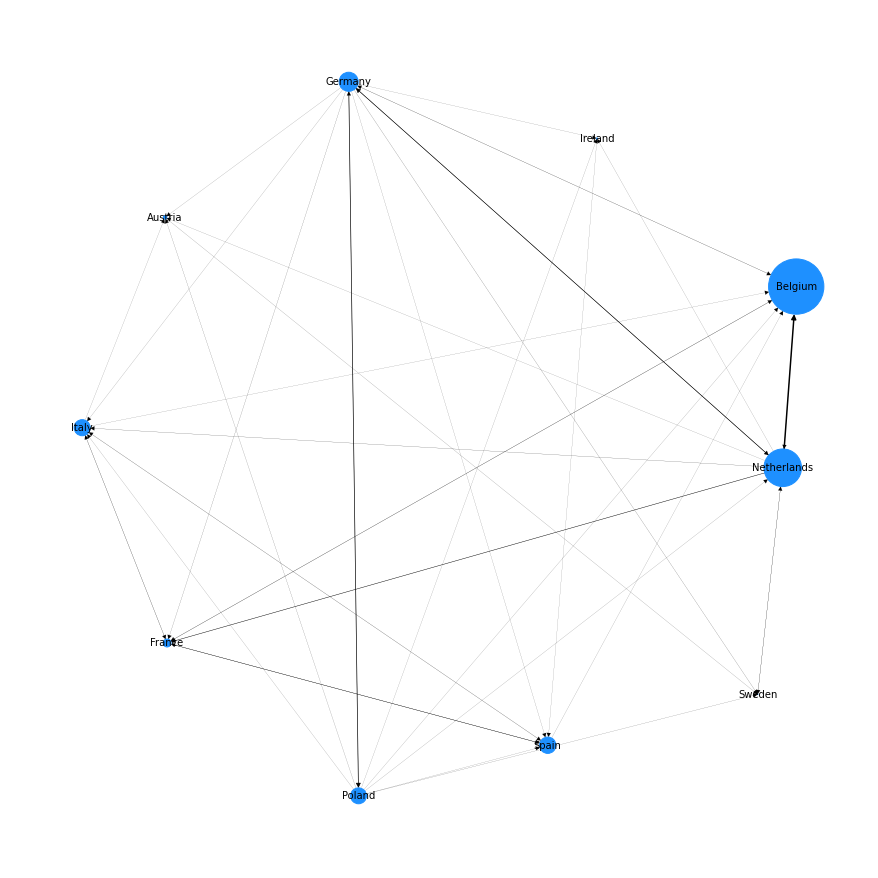

In [37]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)
plt.figure(figsize=(12,12))
nx.draw(H, pos = pos_considered, node_color = 'dodgerblue', node_size=node_sizes, width = weights_considered)
nx.draw_networkx_labels(H, pos = pos_considered, font_size=10)
plt.show()

In [40]:
print(f'Number of edges: {len(weights_considered)-np.argwhere(np.isnan(weights_considered)).shape[0]}')
print(f'Average edge weight: {np.mean(weights_considered)}')
print(f'Average degree: {len(weights_considered[~np.isnan(weights_considered)])/len(node_sizes)}')

Number of edges: 40
Average edge weight: 0.18847572177575717
Average degree: 4.0


In [41]:
df1=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
l=[]
for i in df1.Country:
    l.append(node_sizes_eu[i]/10**4)
df1['Node sizes']=l
df1

,Country,Node sizes
0,Austria,0.001195
1,Belgium,0.305640
2,France,0.006283
3,Germany,0.036275
4,Ireland,0.000109
5,Italy,0.025772
6,Netherlands,0.141381
7,Poland,0.025235
8,Spain,0.026719
9,Sweden,0.000021


## Europe

In [42]:
eu_total=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
   'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [43]:
H = nx.subgraph(G, eu_total)

In [44]:
weights_considered=[]
countries=[]
for (node1,node2,data) in H.edges(data=True):
    weights_considered.append(data['weight'])
    
weights_considered=np.array(weights_considered)*4
weights_considered+=0.1

In [45]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [46]:
node_sizes_eu={}
zz=[]
for i in abc:
    name = i.columns[1]
    tot=0
    for j in range(len(i)):
        if i.iloc[j, 0] in eu_total and i.iloc[j, 1]>0:
            tot+=i.iloc[j, 1]/d[name]
    node_sizes_eu[name]=tot*10**3
    zz.append(name)

In [47]:
node_sizes=[]
for i in list(H.nodes):
    if i in node_sizes_eu.keys():
        node_sizes.append(node_sizes_eu[i])
    else:
        node_sizes.append(10)

In [48]:
node_sizes=np.array(node_sizes)*35

In [49]:
colors = []
for node in H.nodes():
    if node in eu_considered:
        colors.append('dodgerblue')
    elif node in eu_notconsidered:
        colors.append('lime')
    else:
        colors.append('gold')

In [50]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)

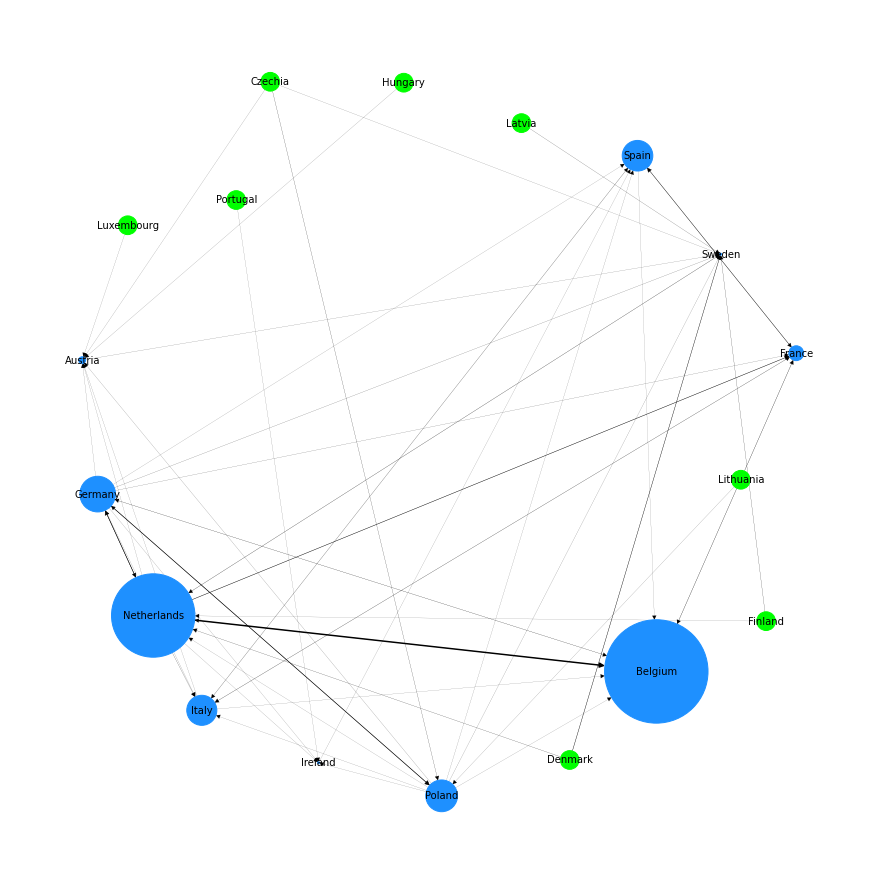

In [51]:
plt.figure(figsize=(12,12))
nx.draw(H, pos = pos_considered, node_color = colors, node_size=node_sizes, width = weights_considered)
nx.draw_networkx_labels(H, pos = pos_considered, font_size=10)
plt.show()

In [53]:
print(f'Number of edges: {len(weights_considered)-np.argwhere(np.isnan(weights_considered)).shape[0]}')
print(f'Average edge weight: {np.mean(weights_considered)}')
print(f'Average degree: {len(weights_considered[~np.isnan(weights_considered)])/len(node_sizes)}')

Number of edges: 52
Average edge weight: 0.17912588159564052
Average degree: 2.888888888888889


In [54]:
df2=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
l=[]
for i in df2.Country:
    l.append(node_sizes_eu[i]/10**3)
df2['Node sizes']=l
df2

,Country,Node sizes
0,Austria,0.001332
1,Belgium,0.305640
2,France,0.006283
3,Germany,0.036275
4,Ireland,0.000109
5,Italy,0.025772
6,Netherlands,0.198685
7,Poland,0.028774
8,Spain,0.026719
9,Sweden,0.000103


## Rest of the world

In [55]:
non_eu = [i for i in list(G.nodes) if i not in eu_total]

In [56]:
total_countries=eu_considered+non_eu

In [57]:
H = nx.subgraph(G, total_countries)

In [58]:
weights_considered=[]
countries=[]
for (node1,node2,data) in H.edges(data=True):
        weights_considered.append(data['weight'])
        
weights_considered=np.array(weights_considered)*4
weights_considered+=0.1

In [59]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [60]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [61]:
node_sizes_eu={}
zz=[]
for i in abc:
    name = i.columns[1]
    tot=0
    for j in range(len(i)):
        if i.iloc[j, 0] in total_countries and i.iloc[j, 1]>0:
            tot+=i.iloc[j, 1]/d[name]
    node_sizes_eu[name]=tot*10**2
    zz.append(name)

In [62]:
node_sizes=[]
for i in list(H.nodes):
    if i in node_sizes_eu.keys():
        node_sizes.append(node_sizes_eu[i])
    else:
        node_sizes.append(10)

In [63]:
node_sizes=np.array(node_sizes)*40

In [64]:
colors = []
for node in H.nodes():
    if node in eu_considered:
        colors.append('dodgerblue')
    elif node in eu_notconsidered:
        colors.append('lime')
    else:
        colors.append('gold')

In [65]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)

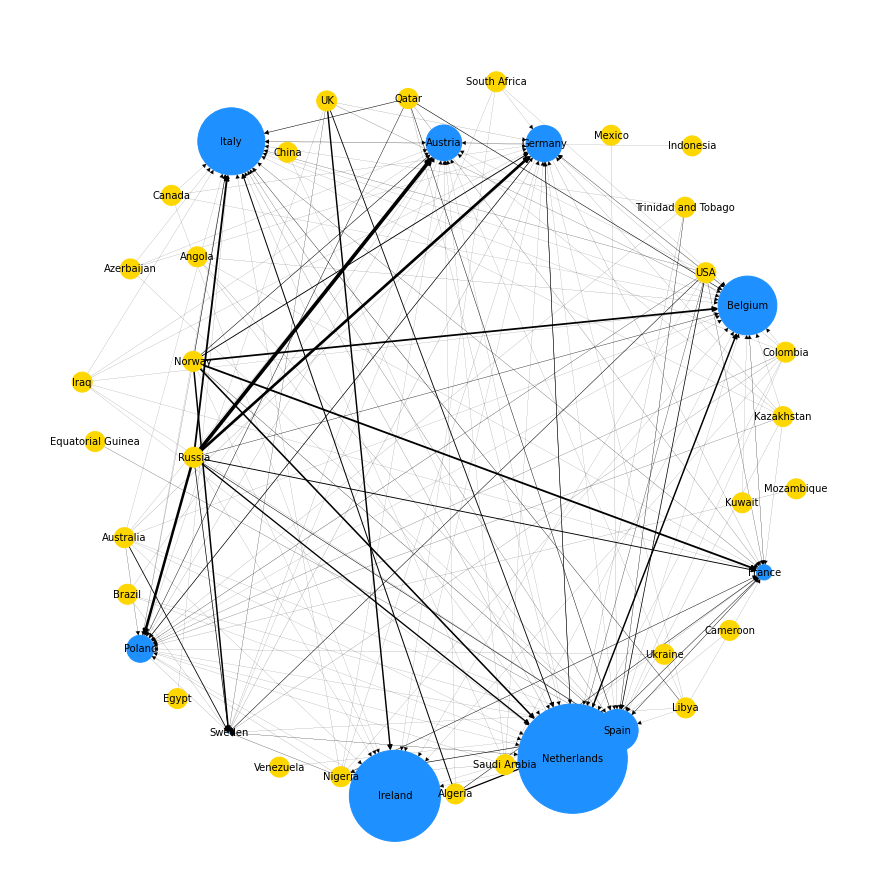

In [66]:
plt.figure(figsize=(12,12))
nx.draw(H, pos = pos_considered, node_color = colors, node_size=node_sizes, width = weights_considered)
nx.draw_networkx_labels(H, pos = pos_considered, font_size=10)
plt.show()

In [67]:
print(f'Number of edges: {len(weights_considered)-np.argwhere(np.isnan(weights_considered)).shape[0]}')
print(f'Average edge weight: {np.mean(weights_considered)}')
print(f'Average degree: {len(weights_considered[~np.isnan(weights_considered)])/len(node_sizes)}')

Number of edges: 175
Average edge weight: 0.31005701450334744
Average degree: 4.487179487179487


In [68]:
df3=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
l=[]
for i in df3.Country:
    l.append(node_sizes_eu[i]/10**2)
df3['Node sizes']=l
df3

,Country,Node sizes
0,Austria,0.316386
1,Belgium,0.862875
2,France,0.058058
3,Germany,0.324989
4,Ireland,2.074293
5,Italy,1.120833
6,Netherlands,2.986237
7,Poland,0.181730
8,Spain,0.437530
9,Sweden,0.000693


# Changing the Network

In [69]:
file=pd.read_csv('Reductions.csv')
decreases_energy=file['Reductions'].tolist()

In [70]:
names = [i.split('/')[-1][:-5] for i in os.listdir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')]
idx=0
countries_reductions=[]
for n, f in enumerate(os.scandir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')):
    names[n] = pd.read_excel(f)
    print(f)
    names[n]['new']=names[n].iloc[:, 1]/sum(names[n].iloc[:, 1])
    a=names[n]
    energy_red=decreases_energy[idx]
    flag=True
    non_eu=[i for i in a['Country'].tolist() if i.strip() not in set(eu_total)]
    while flag==True:
        if energy_red<0.00001:
            flag=False
            break
        val=0
        for h in non_eu:
            val+=a[a['Country']==h].iloc[0, 1]
            
        if val !=0:
            for i in range(len(a)):
                if a.iloc[i, 0] in non_eu:
                    if energy_red*a.iloc[i, 2] - a.iloc[i, 1] <0:
                        a.iloc[i, 1]-=energy_red*a.iloc[i, 2]
                        energy_red-=energy_red*a.iloc[i, 2]
                    else:
                        energy_red-=a.iloc[i, 1]
                        a.iloc[i, 1]=0
                        
        if val == 0: #reduce EU links
            for i in range(len(a)):
                if a.iloc[i, 0] not in non_eu:
                    if energy_red*a.iloc[i, 2] - a.iloc[i, 1] <0:
                        a.iloc[i, 1]-=energy_red*a.iloc[i, 2]
                        energy_red-=energy_red*a.iloc[i, 2]
                    else:
                        energy_red-=a.iloc[i, 1]
                        a.iloc[i, 1]=0
            eu_summer=0
            eu_actual_l=set(a.iloc[:, 0]).intersection(set(eu_total))
            for h in eu_actual_l:
                eu_summer+=a[a['Country']==h].iloc[0, 1]
            if eu_summer==0:
                flag=False
    idx+=1
    countries_reductions.append(a)

<DirEntry 'Austria.xlsx'>
<DirEntry 'Belgium.xlsx'>
<DirEntry 'France.xlsx'>
<DirEntry 'Germany.xlsx'>
<DirEntry 'Ireland.xlsx'>
<DirEntry 'Italy.xlsx'>
<DirEntry 'Netherlands.xlsx'>
<DirEntry 'Poland.xlsx'>
<DirEntry 'Spain.xlsx'>
<DirEntry 'Sweden.xlsx'>


In [72]:
G = nx.DiGraph()
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [73]:
node_sizes_eu=[]
zz=[]
for i in countries_reductions:
    name = i.columns[1]
    node_sizes_eu.append(sum(i.iloc[:, 1])/d[name])
    zz.append(name)

In [76]:
for country in countries_reductions:
    name=country.columns[1]
    country[name]/=sum(country[name])
    for n, w in zip(country.iloc[:, 0], country.iloc[:, 1]):
        G.add_weighted_edges_from([(n.strip(),name.strip(),w)])

In [77]:
colors = []
for node in G.nodes():
    if node in europe:
        colors.append('dodgerblue')
    elif node in eu_notconsidered:
        colors.append('lime')
    else:
        colors.append('gold')

In [78]:
all_weights=[]
countries=[]
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight'])
        countries.append(node2)
all_weights=np.array(all_weights)*4#/np.sum(all_weights)

In [80]:
all_weights[all_weights<0]=all_weights[all_weights>0].min()
all_weights+=0.1

In [81]:
node_sizes_eu=np.array(node_sizes_eu)*7

In [82]:
d={}
for i in range(len(zz)):
    d[zz[i]]=node_sizes_eu[i]

In [83]:
for i in G.nodes():
    if i not in d.keys():
        d[i]=3
b=list(G.nodes())
ws=[0]*len(b)
for i in range(len(ws)):
    for k,v in d.items():
        if b[i]==k:
            ws[i]=v*900
            break

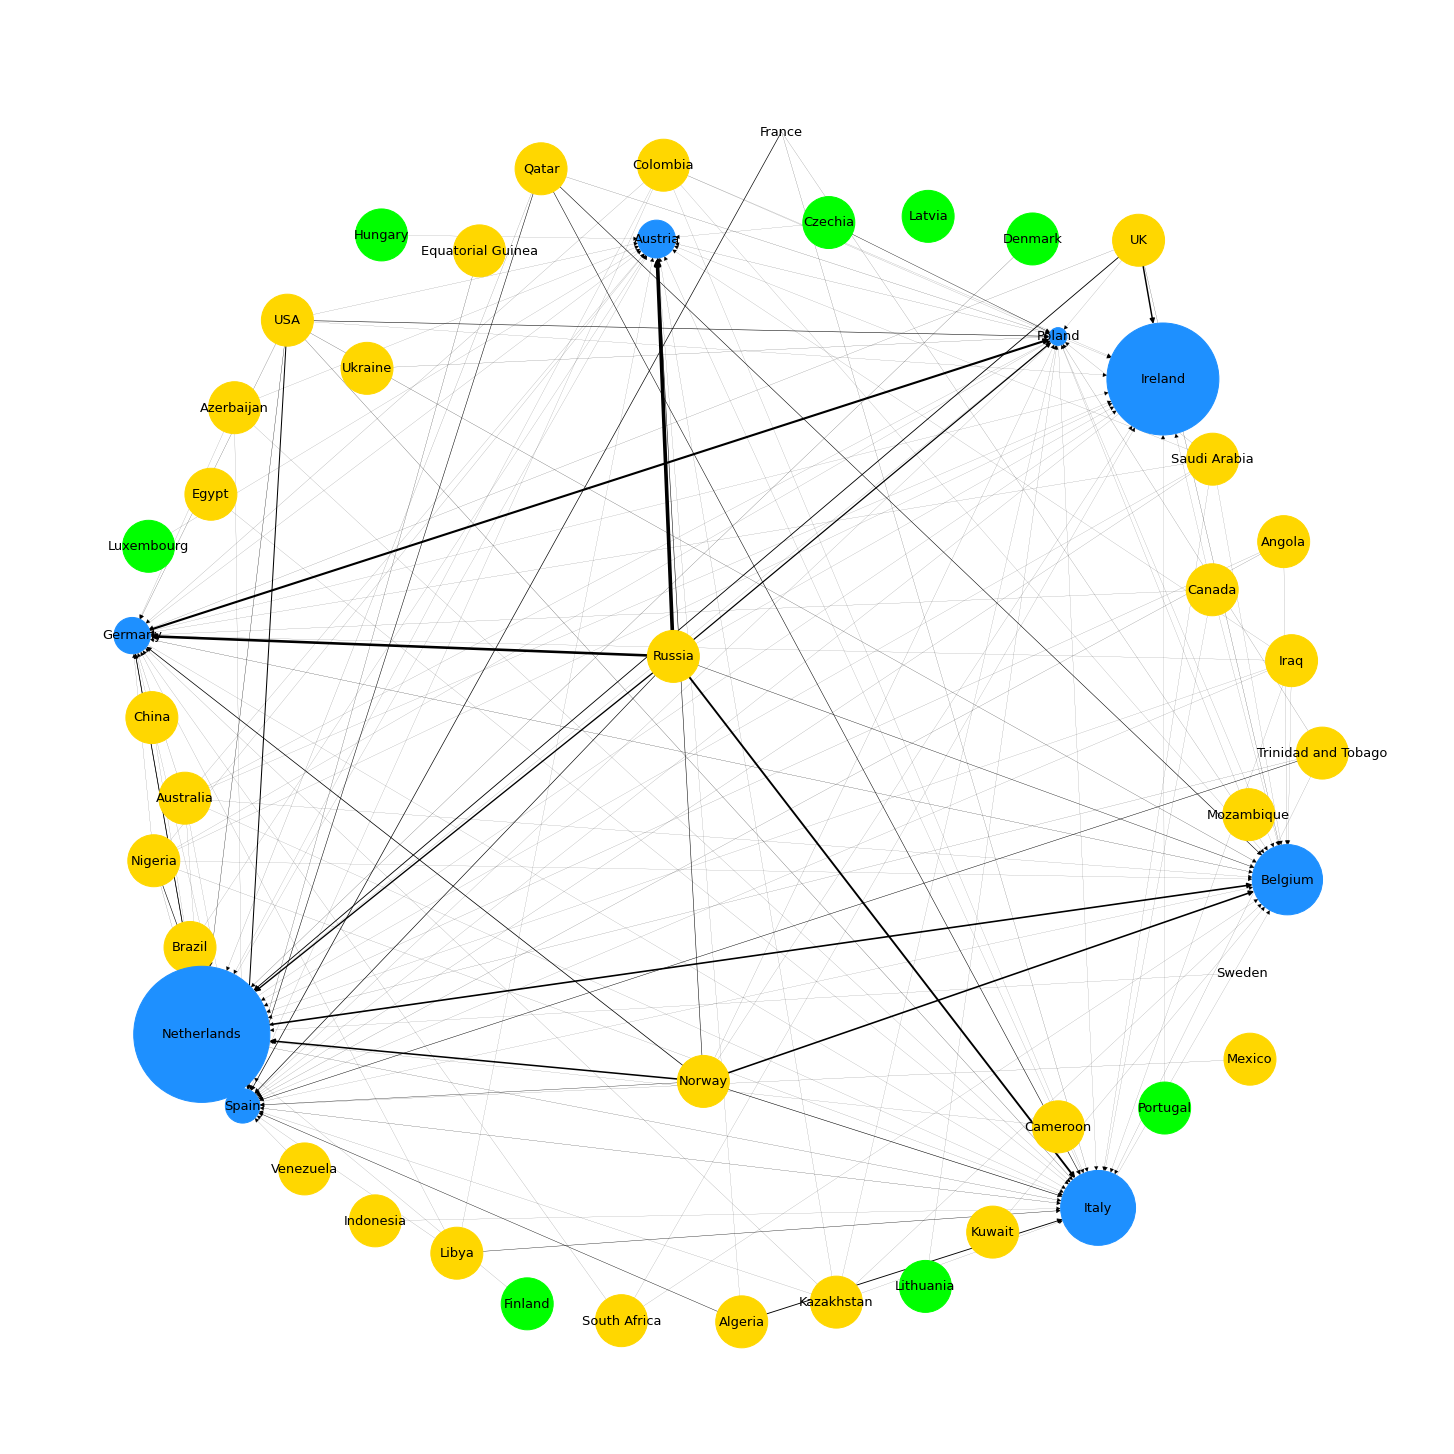

In [84]:
plt.figure(figsize=(20,20))
nx.draw(G, pos = pos,node_color = colors, node_size=ws, width = all_weights)
nx.draw_networkx_labels(G, pos = pos, font_size=13)
#plt.savefig('weighted_reduction.png', bbox_inches = 'tight')
plt.show()

In [86]:
df_bf=np.array(node_sizes_eu)
nodes_ba['Node sizes After']=df_bf/7

In [87]:
nodes_ba['% change']=(nodes_ba['Node sizes After']-nodes_ba['Node sizes Before'])*100/nodes_ba['Node sizes Before']
nodes_ba

,Country,Node sizes Before,Node sizes After,% change
0,Austria,0.316523,0.226558,-28.422885
1,Belgium,0.862875,0.783416,-9.208632
2,France,0.060129,0.000000,-100.000000
3,Germany,0.324989,0.208719,-35.776486
4,Ireland,2.074293,1.989726,-4.076881
5,Italy,1.120833,0.890319,-20.566370
6,Netherlands,3.043542,2.940762,-3.376977
7,Poland,0.185269,0.049912,-73.059893
8,Spain,0.437530,0.188319,-56.958624
9,Sweden,0.000775,0.000000,-100.000000


In [96]:
print(f'Number of edges: {len(all_weights)-np.argwhere(np.isnan(all_weights)).shape[0]}')
print(f'Average edge weight: {np.mean(np.nan_to_num(all_weights))}')
print(f'Average node size: {np.mean(ws)}')

Number of edges: 153
Average edge weight: 0.23880421111821148
Average node size: 3101.0576358099165


# Exploring Sub-Networks

## Only top 10 countries

In [97]:
names = [i.split('/')[-1][:-5] for i in os.listdir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')]
idx=0
countries_reductions=[]
for n, f in enumerate(os.scandir('/Users/fabio/Desktop/University/Bocconi/Semester 2/Simulation and Modelling/Group assignment/Countries_10')):
    names[n] = pd.read_excel(f)
    print(f)
    names[n]['new']=names[n].iloc[:, 1]/sum(names[n].iloc[:, 1])
    a=names[n]
    energy_red=decreases_energy[idx]
    flag=True
    non_eu=[i for i in a['Country'].tolist() if i.strip() not in set(eu_total)]
    while flag==True:
        if energy_red<0.00001:
            flag=False
            break
        val=0
        for h in non_eu:
            val+=a[a['Country']==h].iloc[0, 1]
            
        if val !=0:
            for i in range(len(a)):
                if a.iloc[i, 0] in non_eu:
                    if energy_red*a.iloc[i, 2] - a.iloc[i, 1] <0:
                        a.iloc[i, 1]-=energy_red*a.iloc[i, 2]
                        energy_red-=energy_red*a.iloc[i, 2]
                    else:
                        energy_red-=a.iloc[i, 1]
                        a.iloc[i, 1]=0
                        
        if val == 0: #reduce EU links
            for i in range(len(a)):
                if a.iloc[i, 0] not in non_eu:
                    if energy_red*a.iloc[i, 2] - a.iloc[i, 1] <0:
                        a.iloc[i, 1]-=energy_red*a.iloc[i, 2]
                        energy_red-=energy_red*a.iloc[i, 2]
                    else:
                        energy_red-=a.iloc[i, 1]
                        a.iloc[i, 1]=0
            eu_summer=0
            eu_actual_l=set(a.iloc[:, 0]).intersection(set(eu_total))
            for h in eu_actual_l:
                eu_summer+=a[a['Country']==h].iloc[0, 1]
            if eu_summer==0:
                flag=False
    idx+=1
    countries_reductions.append(a)

<DirEntry 'Austria.xlsx'>
<DirEntry 'Belgium.xlsx'>
<DirEntry 'France.xlsx'>
<DirEntry 'Germany.xlsx'>
<DirEntry 'Ireland.xlsx'>
<DirEntry 'Italy.xlsx'>
<DirEntry 'Netherlands.xlsx'>
<DirEntry 'Poland.xlsx'>
<DirEntry 'Spain.xlsx'>
<DirEntry 'Sweden.xlsx'>


In [99]:
eu_considered=[i for i in eu_total if i not in eu_notconsidered]

In [100]:
H = nx.subgraph(G, eu_considered)

In [101]:
H.nodes

NodeView(('Poland', 'Netherlands', 'Spain', 'Austria', 'France', 'Ireland', 'Italy', 'Germany', 'Belgium', 'Sweden'))

In [102]:
weights_considered=[]
countries=[]
for (node1,node2,data) in H.edges(data=True):
        weights_considered.append(data['weight'])
        
weights_considered=np.array(weights_considered)*4
weights_considered+=0.1

In [103]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [105]:
node_sizes_eu={}
zz=[]
for i in countries_reductions:
    name = i.columns[1]
    tot=0
    for j in range(len(i)):
        if i.iloc[j, 0] in eu_considered and i.iloc[j, 1]>0:
            tot+=i.iloc[j, 1]/d[name]
    node_sizes_eu[name]=tot*10**4
    zz.append(name)

In [107]:
node_sizes=[]
for i in list(H.nodes):
    node_sizes.append(node_sizes_eu[i])

In [108]:
H.nodes

NodeView(('Poland', 'Netherlands', 'Spain', 'Austria', 'France', 'Ireland', 'Italy', 'Germany', 'Belgium', 'Sweden'))

In [110]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)

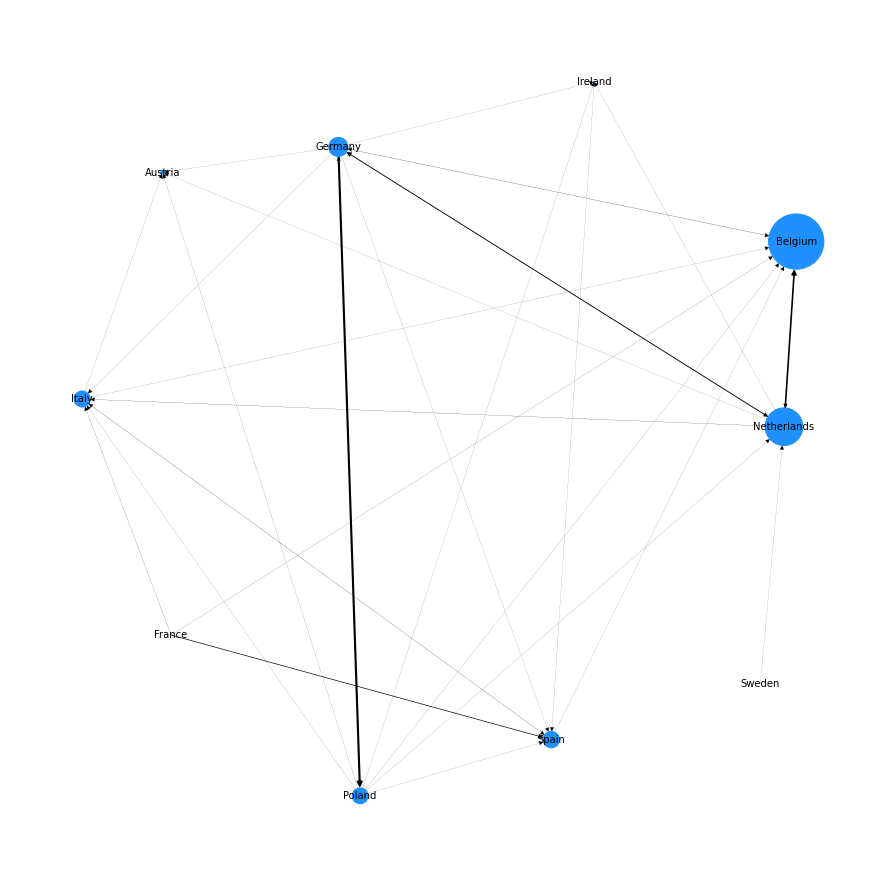

In [111]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)
plt.figure(figsize=(12,12))
nx.draw(H, pos = pos_considered, node_color = 'dodgerblue', node_size=node_sizes, width = weights_considered)
nx.draw_networkx_labels(H, pos = pos_considered, font_size=10)
plt.show()

In [112]:
print(f'Number of edges: {len(weights_considered)-np.argwhere(np.isnan(weights_considered)).shape[0]}')
print(f'Average edge weight: {np.mean(np.nan_to_num(all_weights))}')
print(f'Average degree: {len(weights_considered[~np.isnan(weights_considered)])/len(node_sizes)}')

Number of edges: 31
Average edge weight: 0.23880421111821148
Average degree: 3.1


In [114]:
df1=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
l=[]
for i in df1.Country:
    l.append(node_sizes_eu[i]/10**4)
df1['Node sizes']=l
df1

,Country,Node sizes
0,Austria,0.001195
1,Belgium,0.305640
2,France,0.000000
3,Germany,0.036275
4,Ireland,0.000109
5,Italy,0.025772
6,Netherlands,0.141381
7,Poland,0.025235
8,Spain,0.026719
9,Sweden,0.000000


## Only EU

In [115]:
H = nx.subgraph(G, eu_total)

In [116]:
weights_considered=[]
countries=[]
for (node1,node2,data) in H.edges(data=True):
    weights_considered.append(data['weight'])
    
weights_considered=np.array(weights_considered)*4
weights_considered+=0.1

In [117]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [118]:
node_sizes_eu={}
zz=[]
for i in countries_reductions:
    name = i.columns[1]
    tot=0
    for j in range(len(i)):
        if i.iloc[j, 0] in eu_total and i.iloc[j, 1]>0:
            tot+=i.iloc[j, 1]/d[name]
    node_sizes_eu[name]=tot*10**3
    zz.append(name)

In [120]:
node_sizes=[]
for i in list(H.nodes):
    if i in node_sizes_eu.keys():
        node_sizes.append(node_sizes_eu[i])
    else:
        node_sizes.append(10)

In [121]:
node_sizes=np.array(node_sizes)*35

In [122]:
colors = []
for node in H.nodes():
    if node in eu_considered:
        colors.append('dodgerblue')
    elif node in eu_notconsidered:
        colors.append('lime')
    else:
        colors.append('gold')

In [123]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)

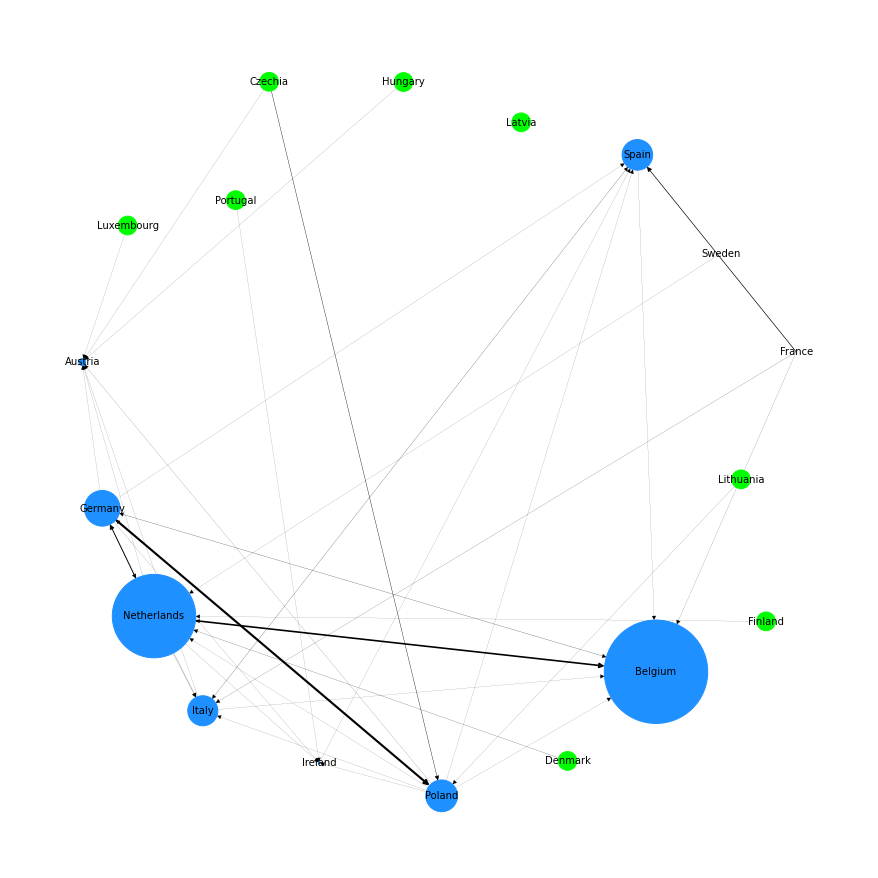

In [124]:
plt.figure(figsize=(12,12))
nx.draw(H, pos = pos_considered, node_color = colors, node_size=node_sizes, width = weights_considered)
nx.draw_networkx_labels(H, pos = pos_considered, font_size=10)
plt.show()

In [125]:
print(f'Number of edges: {len(weights_considered)-np.argwhere(np.isnan(weights_considered)).shape[0]}')
print(f'Average edge weight: {np.mean(np.nan_to_num(all_weights))}')
print(f'Average degree: {len(weights_considered[~np.isnan(weights_considered)])/len(node_sizes)}')

Number of edges: 39
Average edge weight: 0.23880421111821148
Average degree: 2.1666666666666665


In [126]:
df2=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
l=[]
for i in df2.Country:
    l.append(node_sizes_eu[i]/10**3)
df2['Node sizes']=l
df2

,Country,Node sizes
0,Austria,0.001332
1,Belgium,0.305640
2,France,0.000000
3,Germany,0.036275
4,Ireland,0.000109
5,Italy,0.025772
6,Netherlands,0.198685
7,Poland,0.028774
8,Spain,0.026719
9,Sweden,0.000000


### Non-EU

In [127]:
non_eu = [i for i in list(G.nodes) if i not in eu_total]

In [128]:
total_countries=eu_considered+non_eu

In [129]:
H = nx.subgraph(G, total_countries)

In [130]:
weights_considered=[]
countries=[]
for (node1,node2,data) in H.edges(data=True):
        weights_considered.append(data['weight'])
        
weights_considered=np.array(weights_considered)*4
weights_considered+=0.1

In [131]:
total_cons=pd.read_csv('total_consumption.csv')
d={}
a=total_cons['Country Name'].tolist()
b=total_cons['Total consumption (Twh)'].tolist()
for i in range(len(a)):
    if a[i].strip()=='Czech Republic':
        d['Czechia']=b[i]*1000
        
    if a[i].strip()=='Slovak Republic':
        d['Slovakia']=b[i]*1000
        
    else:
        d[a[i].strip()]=b[i]*1000
total_cons.head(2)

,Country Name,Total consumption (Twh)
0,Austria,71.45
1,Belgium,84.66


In [132]:
node_sizes_eu={}
zz=[]
for i in countries_reductions:
    name = i.columns[1]
    tot=0
    for j in range(len(i)):
        if i.iloc[j, 0] in total_countries and i.iloc[j, 1]>0:
            tot+=i.iloc[j, 1]/d[name]
    node_sizes_eu[name]=tot*10**2
    zz.append(name)

In [134]:
node_sizes=[]
for i in list(H.nodes):
    if i in node_sizes_eu.keys():
        node_sizes.append(node_sizes_eu[i])
    else:
        node_sizes.append(10)

In [135]:
node_sizes=np.array(node_sizes)*40

In [136]:
colors = []
for node in H.nodes():
    if node in eu_considered:
        colors.append('dodgerblue')
    elif node in eu_notconsidered:
        colors.append('lime')
    else:
        colors.append('gold')

In [137]:
pos_considered=nx.spring_layout(H, k=1.45,seed=2)

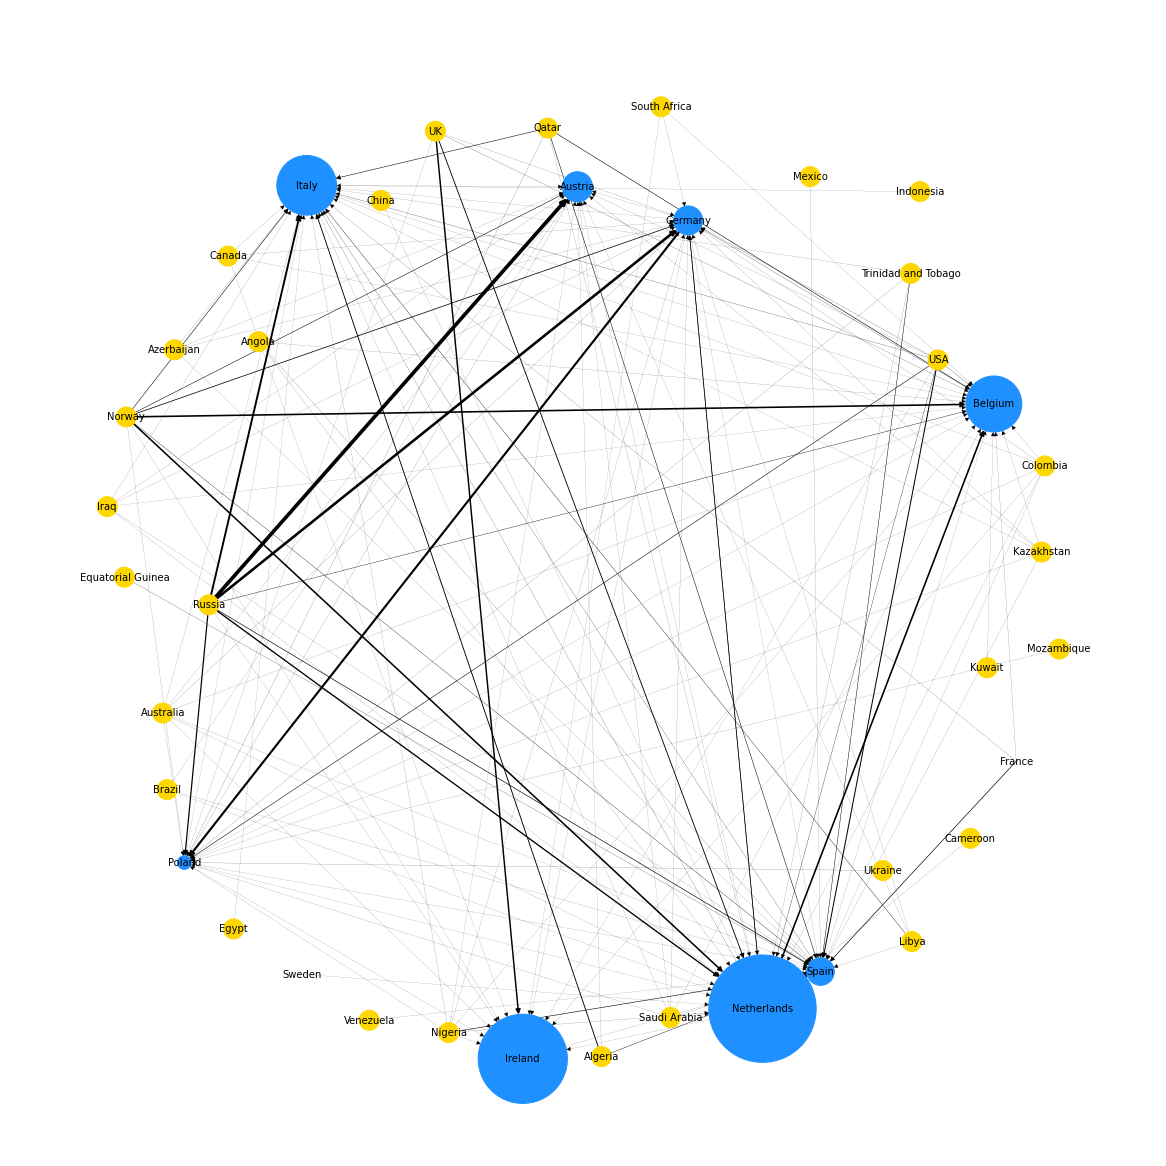

In [138]:
plt.figure(figsize=(16,16))
nx.draw(H, pos = pos_considered, node_color = colors, node_size=node_sizes, width = weights_considered)
nx.draw_networkx_labels(H, pos = pos_considered, font_size=10)
plt.show()

In [140]:
print(f'Number of edges: {len(weights_considered)-np.argwhere(np.isnan(weights_considered)).shape[0]}')
print(f'Average edge weight: {np.mean(np.nan_to_num(all_weights))}')
print(f'Average degree: {len(weights_considered[~np.isnan(weights_considered)])/len(node_sizes)}')

Number of edges: 145
Average edge weight: 0.23880421111821148
Average degree: 3.717948717948718


In [141]:
df3=pd.DataFrame(zz).rename({0:'Country'}, axis=1)
l=[]
for i in df3.Country:
    l.append(node_sizes_eu[i]/10**2)
df3['Node sizes']=l
df3

,Country,Node sizes
0,Austria,0.226421
1,Belgium,0.783416
2,France,0.000000
3,Germany,0.208719
4,Ireland,1.989726
5,Italy,0.890319
6,Netherlands,2.883457
7,Poland,0.046373
8,Spain,0.188319
9,Sweden,0.000000
